# Vidego Game Data Cleaning

## Table of Contents
<ul>
<li><a href="#PartB">Description of Variables</a></li>
<li><a href="#PartC1">Plan to Identify Data Anomalies</a></li>
<li><a href="#PartC2">Justification of Plan</a></li>
<li><a href="#PartC3">Justify Programming Language/Packages</a></li> 
<li><a href="#PartC4">Code Used To Identify Anomalies</a></li> 
<li><a href="#PartD1">Describe Anomalous Findings</a></li>
<li><a href="#PartD2">Plans For Mitigating Anomalies</a></li>
<li><a href="#PartD3">Summarize Outcomes of Cleaning Operations</a></li> 
<li><a href="#PartD4">Code Used to Mitigate Anomalies</a></li> 
<li><a href="#PartD5">Copy of Cleaned Data Set</a></li>
<li><a href="#PartD6">Limitations of Data Cleaning Process</a></li>
<li><a href="#PartD7">Challenges Imposed by Limitations</a></li>
<li><a href="#PartE1">List Principal Components</a></li>
<li><a href="#PartE2">Identification of Principal Components</a></li>
<li><a href="#PartE3">Benefits of Principal Component Analysis</a></li>
<li><a href="#PartF">Panopto Recording</a></li>
<li><a href="#PartG">Code References</a></li>
<li><a href="#PartH">Source References</a></li>    
</ul>

<a id='PartA'></a>
## A: Research Question


<a id='PartB'></a>
## B: Description of Variables

This dataset contains 15 separate columns, each containing a field relating to a video game. Each will be summarized here. 

- Title (qualitative), row 1 example: Grand Theft Auto V <br>
This column is used to identify the title of the game.


- Console (qualitative), row 1 example: PS3  <br>
    This column is used to identify the console  which the game can be played on.


- Genre (qualitative), row 1 example: Action  <br>
This column is used to identify the type of genre the game is associated with.


- Publisher (qualitative), row 1 example: Rockstar Games <br>
This column is used to identify company/group/entity who published the game.
 
 
- Developer (qualitative), row 1 example: Rockstar North <br>
This column is used to identify company/group/entity who developed the game.


- Critic_Score (quantitative), row 1 example: 9.4 <br>
This column is used identify a game's review score given by professional organization on a scale of 1.0 to 10.0 points. 

- Total_Sales (quantitative), row 1 example: 20.32 <br>
This column identify a game's  global sales of copies in millions.


- NA_Sales (quantitative), row 1 example: 6.37 <br>
This column identify a game's North American sales of copies in millions. 

- JP_Sales (quantitative), row 1 example: 0.99 <br>
This columns identify a game's Japan sales of copies in millions 

- PAL_Sales (quantitative), row 1 example: 9.85 <br>
This columns identify a game's Europe/Africa sales of copies in millions.

- Other_Sales (quantitative), row 1 example: 3.12 <br>
This column identify a game's other sales of copies in millions. 

- Release_Date (qualitative), row 1 example: 9/17/2013 <br>
This column identify the date when the game is released 

- Last_Updated (qualitative), row 2 example: 1/3/2018 <br>
This column identify the date when the data was last updated.


<a id='PartC1'></a>
## C1: Plan To Identify Data Anomalies

To identify anomalies in the provided dataset, after importing the data from the CSV, I will use the associated data dictionary and a cursory visual exploration of the dataset to identify any common data problems. The following python functions will be used to identify datatype mismatch, duplicates, missing values, outliers, and re-expressed categorical variables: 
* Other Data Quality Issue:
    - `info()`, `value_counts()`, and `describe()`<br><br>
    
* Duplicates:
    - `duplicated()` and `.value_counts()` <br><br>
    
* Missing Values:
    - `isnull().sum()` and `missingno.matrix(df, labels=True)` <br><br>
    
* Outliers:
    - `describe()` and  `.boxplot(x='col_name', data=df)`<br><br>
    
* Re-expressed catergorical variables:
    - `info()` and `unique()` <br><br>
    
<a id='PartC2'></a>
## C2: Justification of Plan

This plan approaches the data cleaning process by looking at the table as a whole and a boarder perspective by evaluating the data in each column. Using the data dictionary provided alongside the data set informs my assessments to ensure they are handled consistently with the intended usage/business interest for each variable within the dataset.

The `info()` function profiles the data to identify and validate datatypes against the medical data dictionary. Once profiling is completed, we will check if any duplicates exist within the data set using `duplicated().value_counts()`. Next we will check for missing values by implementing the method chain `isnull().sum()` and visualize the variables with missing values by using `missingno.matrix(df, labels=True)`. After noting the anomalies, we will check for outliers using the `sns.boxplot(x='col_name', data=df)` on each quantitative variable. Lastly, the function`info()` will be used again to identify the categorical variables and the `unique()` function to determine if the categorical variable can and should be re-expressed.

<a id='PartC3'></a>
## C3: Justify Programming Language/Packages

Python is a powerful programming language that allows for creating scripts to acquire, clean, and analyze data. The primary packages for this process are `numpy`, `pandas`, `matplotlib`, `scipy` and `missingno`. Numpy supplies math functions that are necessary for transforming the data; pandas provides a logical structure called a dataframe, which enables us to store the CSV in a spreadsheet-like format with functions to transform or standardize the data as needed and `missingno` give us visualization capabilities to verify missing values. After the data is cleaned, a Principal Component Analysis will be performed, and this is going to make use of `PCA` from `SKlearn` to perform the analysis of principal components, as well as `seaborn` to graph any scree plots used as a part of this PCA.

<a id='PartC4'></a>
## C4: Code Used To Identify Anomalies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from scipy import stats

In [2]:
# The CSV's first column is an index and Pandas will duplicate this and create an column without 'index_col=0'
df = pd.read_csv('./medical_raw_data.csv', index_col=0)

# Visually inspect dataframe to facilitate exploration, spot problems
pd.set_option("display.max_columns", None)
df.head()


,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,Timezone,Job,Children,Age,Education,Employment,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1.0,53.0,"Some College, Less than 1 Year",Full Time,86575.93,Divorced,Male,No,17.802330,6,0,0,NaN,Emergency Admission,Yes,No,Medium,0.0,Yes,Yes,No,Yes,1.0,Yes,No,Yes,Blood Work,10.585770,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3.0,51.0,"Some College, 1 or More Years, No Degree",Full Time,46805.99,Married,Female,No,18.994640,4,2,1,No,Emergency Admission,Yes,No,High,1.0,No,No,No,No,NaN,No,Yes,No,Intravenous,15.129562,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3.0,53.0,"Some College, 1 or More Years, No Degree",Retired,14370.14,Widowed,Female,No,17.415889,4,1,0,No,Elective Admission,Yes,No,Medium,1.0,No,Yes,No,No,NaN,No,No,No,Blood Work,4.772177,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0.0,78.0,GED or Alternative Credential,Retired,39741.49,Married,Male,No,17.420079,4,1,0,No,Elective Admission,No,Yes,Medium,0.0,Yes,No,No,No,NaN,No,Yes,Yes,Blood Work,1.714879,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,NaN,22.0,Regular High School Diploma,Full Time,1209.56,Widowed,Female,No,16.870524,5,0,2,Yes,Elective Admission,No,No,Low,0.0,No,No,Yes,No,0.0,Yes,No,No,CT Scan,1.254807,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [3]:
# Check data types and number of values, as well as overall size of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  Timezone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            7412 non-null   float64
 15  Age                 7586 non-null   float64
 16  Educ

In [4]:
# Check key constraints on CaseOrder, Customer_id, Interaction, and UID 
unique_cols = df[['CaseOrder', 'Customer_id', 'Interaction', 'UID']]
for col in unique_cols:
    print(col)
    print(unique_cols[col].value_counts().count())

CaseOrder
10000
Customer_id
10000
Interaction
10000
UID
10000


In [5]:
# Identify if any duplicates exists
df.duplicated().value_counts()

False    10000
dtype: int64

In [6]:
#Validate values are categorical
df.Area.value_counts()

Rural       3369
Suburban    3328
Urban       3303
Name: Area, dtype: int64

In [7]:
# Check full range of values, determine suitability for datatype categorical
df.Timezone.value_counts()

America/New_York                  3889
America/Chicago                   3771
America/Los_Angeles                937
America/Denver                     612
America/Detroit                    262
America/Indiana/Indianapolis       151
America/Phoenix                    100
America/Boise                       86
America/Anchorage                   50
America/Puerto_Rico                 43
Pacific/Honolulu                    34
America/Menominee                   14
America/Nome                        12
America/Indiana/Vincennes            8
America/Kentucky/Louisville          6
America/Sitka                        6
America/Toronto                      5
America/Indiana/Marengo              3
America/Indiana/Tell_City            3
America/North_Dakota/Beulah          2
America/Yakutat                      1
America/Indiana/Winamac              1
America/Indiana/Knox                 1
America/North_Dakota/New_Salem       1
America/Indiana/Vevay                1
America/Adak             

In [8]:
# Verify data are within reasonable bounds.
df.Children.describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [9]:
# Verify data are within reasonable bounds and suitable for current dtyoe.
df.Age.describe()

count    7586.000000
mean       53.295676
std        20.659182
min        18.000000
25%        35.000000
50%        53.000000
75%        71.000000
max        89.000000
Name: Age, dtype: float64

In [10]:
#Validate values are categorical.
df.Education.value_counts()

Regular High School Diploma                 2444
Bachelor's Degree                           1724
Some College, 1 or More Years, No Degree    1484
9th Grade to 12th Grade, No Diploma          832
Associate's Degree                           797
Master's Degree                              701
Some College, Less than 1 Year               642
Nursery School to 8th Grade                  552
GED or Alternative Credential                389
Professional School Degree                   208
No Schooling Completed                       133
Doctorate Degree                              94
Name: Education, dtype: int64

In [11]:
#Validate values are categorical
df.Employment.value_counts()

Full Time     6029
Student       1017
Part Time      991
Unemployed     983
Retired        980
Name: Employment, dtype: int64

In [12]:
# Verify data exists within reasonable bounds
df.Income.describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [13]:
#Validate values are categorical
df.Marital.value_counts()

Widowed          2045
Married          2023
Separated        1987
Never Married    1984
Divorced         1961
Name: Marital, dtype: int64

In [14]:
#Validate values are categorical
df.Gender.value_counts()

Female                  5018
Male                    4768
Prefer not to answer     214
Name: Gender, dtype: int64

In [15]:
# Verify data is suitable for current datatype(boolean)
df.ReAdmis.value_counts()

No     6331
Yes    3669
Name: ReAdmis, dtype: int64

In [16]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.VitD_levels.describe()

count    10000.000000
mean        19.412675
std          6.723277
min          9.519012
25%         16.513171
50%         18.080560
75%         19.789740
max         53.019124
Name: VitD_levels, dtype: float64

In [17]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.Doc_visits.describe()

count    10000.000000
mean         5.012200
std          1.045734
min          1.000000
25%          4.000000
50%          5.000000
75%          6.000000
max          9.000000
Name: Doc_visits, dtype: float64

In [18]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

In [19]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.VitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: VitD_supp, dtype: float64

In [20]:
# Verify data is suitable for current datatype(boolean)
df.Soft_drink.value_counts()

No     5589
Yes    1944
Name: Soft_drink, dtype: int64

In [21]:
#Validate values are categorical
df.Initial_admin.value_counts()

Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: Initial_admin, dtype: int64

In [22]:
# Verify data is suitable for current datatype(boolean)
df.HighBlood.value_counts()

No     5910
Yes    4090
Name: HighBlood, dtype: int64

In [23]:
# Verify data is suitable for current datatype(boolean)
df.Stroke.value_counts()

No     8007
Yes    1993
Name: Stroke, dtype: int64

In [24]:
#Validate values are categorical
df.Complication_risk.value_counts()

Medium    4517
High      3358
Low       2125
Name: Complication_risk, dtype: int64

In [25]:
# Verify data is suitable for current datatype(boolean)
df.Overweight.value_counts()

1.0    6395
0.0    2623
Name: Overweight, dtype: int64

In [26]:
# Verify data is suitable for current datatype(boolean)
df.Arthritis.value_counts()

No     6426
Yes    3574
Name: Arthritis, dtype: int64

In [27]:
# Verify data is suitable for current datatype(boolean)
df.Diabetes.value_counts()

No     7262
Yes    2738
Name: Diabetes, dtype: int64

In [28]:
# Verify data is suitable for current datatype(boolean)
df.Hyperlipidemia.value_counts()

No     6628
Yes    3372
Name: Hyperlipidemia, dtype: int64

In [29]:
# Verify data is suitable for current datatype(boolean)
df.BackPain.value_counts()

No     5886
Yes    4114
Name: BackPain, dtype: int64

In [30]:
# Verify data is suitable for current datatype(boolean)
df.Anxiety.value_counts()

0.0    6110
1.0    2906
Name: Anxiety, dtype: int64

In [31]:
# Make sure values are suitable to be placed into datatype boolean
df.Allergic_rhinitis.value_counts()

No     6059
Yes    3941
Name: Allergic_rhinitis, dtype: int64

In [32]:
# Verify data is suitable for current datatype(boolean)
df.Asthma.value_counts()

No     7107
Yes    2893
Name: Asthma, dtype: int64

In [33]:
#Validate values are categorical
df.Services.value_counts()

Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: Services, dtype: int64

In [34]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.Initial_days.describe()

count    8944.000000
mean       34.432082
std        26.287050
min         1.001981
25%         7.911709
50%        34.446941
75%        61.124654
max        71.981486
Name: Initial_days, dtype: float64

In [35]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.TotalCharge.describe()

count    10000.000000
mean      5891.538261
std       3377.558136
min       1256.751699
25%       3253.239465
50%       5852.250564
75%       7614.989701
max      21524.224210
Name: TotalCharge, dtype: float64

In [36]:
# Verify data are within reasonable bounds and suitable for current datatype.
df.Additional_charges.describe()

count    10000.000000
mean     12934.528586
std       6542.601544
min       3125.702716
25%       7986.487642
50%      11573.979365
75%      15626.491033
max      30566.073130
Name: Additional_charges, dtype: float64

In [37]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item1.value_counts()

4    3455
3    3404
5    1377
2    1315
6     225
1     213
7      10
8       1
Name: Item1, dtype: int64

In [38]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item2.value_counts()

3    3439
4    3351
5    1421
2    1360
1     213
6     204
7      12
Name: Item2, dtype: int64

In [39]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item3.value_counts()

4    3464
3    3379
5    1358
2    1356
6     220
1     211
7      11
8       1
Name: Item3, dtype: int64

In [40]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item4.value_counts()

3    3422
4    3394
5    1388
2    1346
6     231
1     207
7      12
Name: Item4, dtype: int64

In [41]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item5.value_counts()

4    3446
3    3423
2    1380
5    1308
6     219
1     211
7      13
Name: Item5, dtype: int64

In [42]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item6.value_counts()

4    3464
3    3371
5    1403
2    1319
6     220
1     213
7      10
Name: Item6, dtype: int64

In [43]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item7.value_counts()

4    3487
3    3456
2    1345
5    1274
1     215
6     212
7      11
Name: Item7, dtype: int64

In [44]:
# Verify data exists within 1 - 8 constraint and is suitable to be stored as datatype ordered categorical
df.Item8.value_counts()

3    3401
4    3337
5    1429
2    1391
6     221
1     209
7      12
Name: Item8, dtype: int64

In [45]:
# Identify if missing values exist
df.isnull().sum()

CaseOrder                0
Customer_id              0
Interaction              0
UID                      0
City                     0
State                    0
County                   0
Zip                      0
Lat                      0
Lng                      0
Population               0
Area                     0
Timezone                 0
Job                      0
Children              2588
Age                   2414
Education                0
Employment               0
Income                2464
Marital                  0
Gender                   0
ReAdmis                  0
VitD_levels              0
Doc_visits               0
Full_meals_eaten         0
VitD_supp                0
Soft_drink            2467
Initial_admin            0
HighBlood                0
Stroke                   0
Complication_risk        0
Overweight             982
Arthritis                0
Diabetes                 0
Hyperlipidemia           0
BackPain                 0
Anxiety                984
A

<Axes: >

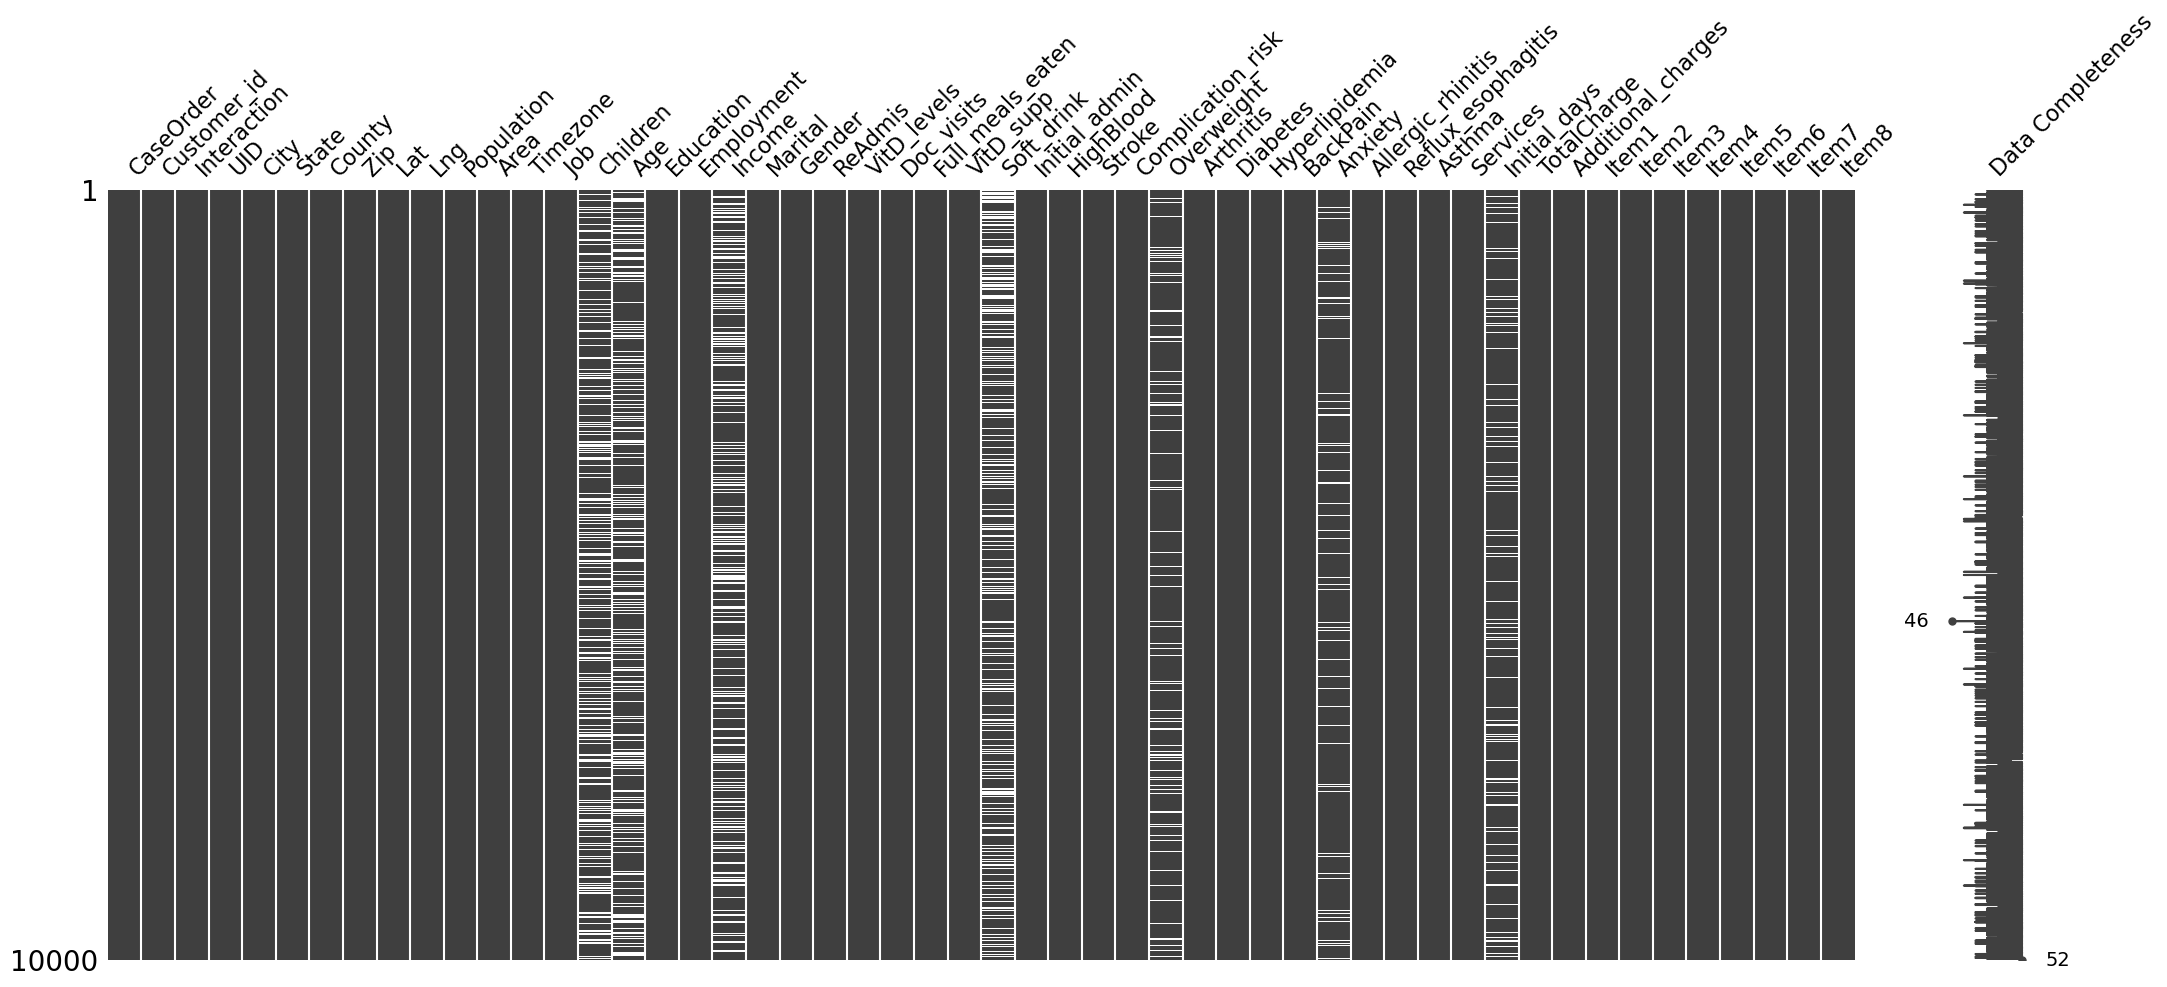

In [46]:
# Visualize missing values 
import missingno as msno
msno.matrix(df, labels=True)

<Axes: xlabel='Children', ylabel='Count'>

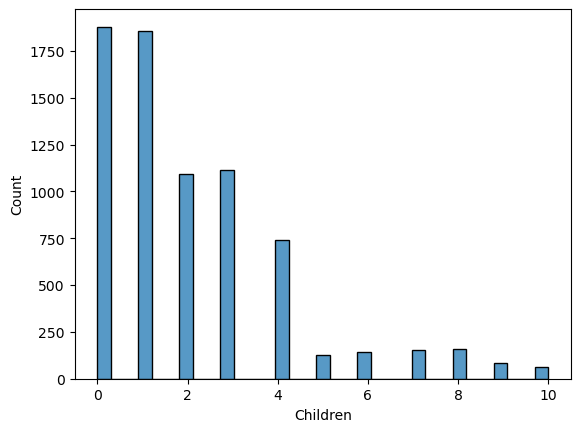

In [47]:
#Show distrubition for Children field
sns.histplot(data=df['Children'])

Children variable distribution is a positive skew

<Axes: xlabel='Age', ylabel='Count'>

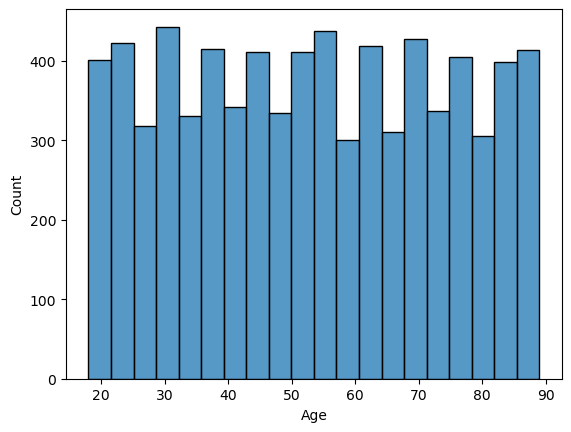

In [48]:
#Show distrubition for Age field
sns.histplot(data=df['Age'])

Age variable distribution is Uniform

<Axes: >

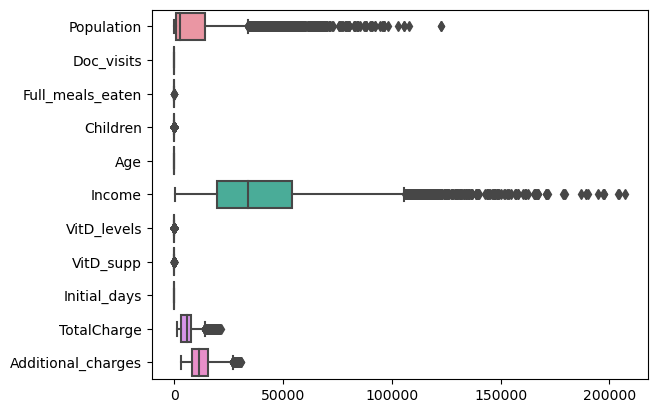

In [49]:
#Detect Outliers
import seaborn as sns

# Select the columns you want to create horizontal box plots for
columns_to_plot = ['Population','Doc_visits', 'Full_meals_eaten', 'Children', 'Age', 'Income', 'VitD_levels', 'VitD_supp', 'Initial_days', 'TotalCharge','Additional_charges']


sns.boxplot(data=df[columns_to_plot],orient='h')

In [50]:
#Identify the number of outlers in population

# Create copy of df:
df_outliers = df

#Set z_score threshold
z_score_threshold = 3

outliers_cols = ['Population', 'Income']

for col in outliers_cols:
    df_outliers['z_score_'+col.lower()] = stats.zscore(df_outliers[col], nan_policy='omit')
    #Display the calculated z-score and the values
    print(df_outliers[[col, 'z_score_'+col.lower()]].head())


   Population  z_score_population
1        2951           -0.473168
2       11303            0.090242
3       17125            0.482983
4        2162           -0.526393
5        5287           -0.315586
     Income  z_score_income
1  86575.93        1.608051
2  46805.99        0.220548
3  14370.14       -0.911082
4  39741.49       -0.025920
5   1209.56       -1.370231


In [51]:
#Stores obersavations where the z score is greater than the threshold
df_outliers_population = df_outliers[df_outliers['z_score_population'] > z_score_threshold]

#Count the number of outliers present within the Population feature
df_outliers_population['Population'].sort_values()

289      54453
965      54460
6797     54507
3820     54647
3186     54647
         ...  
768     105799
7687    105799
5966    107700
9663    122814
3025    122814
Name: Population, Length: 218, dtype: int64

In [52]:
df_outliers_income = df_outliers[df_outliers['z_score_income'] > z_score_threshold]
df_outliers_income['Income'].sort_values()

8996    127026.59
1373    127505.80
5847    127566.08
1980    127857.49
612     128108.35
          ...    
1779    197576.18
6407    197675.05
8599    203774.65
842     204542.41
8387    207249.13
Name: Income, Length: 113, dtype: float64

<a id='PartD1'></a>
## D1: Describe Anomalous Findings

Upon examining the code and dataframe, several issues were found that need corrections to enable effective data analysis.:

<h2>Data Mismatch and Miscellaneous Issues</h2>

- Zip codes are stored as integers rather than strings, and have lost their leadings 0's as a result
- Area is stored as a string object, but would be more appropriately & efficiently stored as a category
- Timezones have 26 different timezones listed, broken down by city, should be standardized to the 9 US time zones and create a seperate feature for city
- Children is stored as a floating point number, should be an integer
- Age is stored as a floating point number, should be an integer
- Education is stored as a string object, but would be more appropriately & efficiently stored as a category
- Marital is stored as a string object, but would be more appropriately & efficiently stored as a category
- Gender is stored as a string object, but would be more appropriately & efficiently stored as a category
- Gender contains "Male", "Female", and "Prefer not to answer", while data dictionary states that it should instead contain "Male", "Female", and "Non-Binary".
- ReAdmis is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Soft_drink is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- HighBlood is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Stroke is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Arthritis is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Diabetes is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Hyperlipidemia is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- BackPain is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Allergic_rhinitis is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Reflux_esophagitis is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Asthma is stored as a string object, but would be more appropriately & efficiently stored as a boolean
- Services is stored as a string object, but would be more appropriately & efficiently stored as a category
- Initial_days is stored as a floating point number, but would be more appropriately stored as an integer
- Initial_days does not seem to contain any number less than 1, indicating that NaNs can be replaced with 0
- TotalCharge is stored to 6 decimal places, this is excessive precision, will round down to 2 decimal places
- Additional_charge is stored to 6 decimal places, this is excessive precision, will round down to 2 decimal places
- Item1 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item2 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item3 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item4 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item5 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item6 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item7 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Item8 is stored as an integer, but would be more appropriately & efficiently stored as an ordered categorical 
- Many columns have non-Pythonic naming conventions, being inconsistent with their usage of capital letters, underscores, etc.
- Many columns (i.e. "Item1", "TotalCharge") are non-descriptive or misleading in their labels
    
<h2>Duplicated value</h2>
No duplicates were found that would impact future analysis.
    
<h2>Missing Values</h2>
Found missing values for the following variables:

|Variable|Number of missing values|
|--------|------------------------|
|Children|2588|
|Age|2414|
|Income|2464|
|Soft_drink|2467|
|Overweight|982|
|Anxiety|984|
|Initial_days|1056|


<h2>Outliers</h2>
Found outliers for the following variables:

|Variable|Number of Outlier|
|--------|------------------------|
|Population|218|
|Income|113|

<h2>Catorgorical Data Needing to be Reexpressed</h2>

- Overweight is stored as a floating point number, but should re-expressed as a boolean
- Anxiety is stored as a floating point number, but should re-expressed as a boolean

<a id='PartD2'></a>
## D2: Plans For Mitigating Anomalies

<h2>Data Mismatch and Miscellaneous Issues</h2>
- The non-Pythonic and misleading/non-descriptive names will be corrected by renaming each column to be Pythonically and descriptively named. 

- The floating point columns with excessive precision values will be rounded to a more appropriate number of decimal places.

- To correct the zip codes which were incorrectly stored as integers, I will recast the column as a string, and then front-fill each cell with 0's to make sure all cells contain a string 5 digits long. 

- The `Age` and `Children` variables, which need to be changed from floating points to integers, must also retain their `NaN` values. Recasting these columns to the default `int64` type will fail because of the NaN values, which ordinarily require the datatype to be float. The experimental `Int64` datatype in the pandas documentation is a new integer datatype, distinct from NumPy's `int64`, which allows these columns to be cast as integers while retaining support for `NaN` or null values.

- Timezone: To correct the timezones, a dictionary will be generated, equating each provided timezone (i.e. "America/Detroit") to a standard for their entire timezone (i.e. "US - Eastern"). A google search will be performed for each city to get the appropriate timezone, and the dictionary will be used to replace all current strings for timezone to the standardized timezones. The column will then be converted to category to prevent other incorrect/non-standard strings from being entered. 



- The columns identified as being more appropriate stored as strings, integers, or floats which would more appropriately be stored as categorical or boolean types will be recast in the appropriate datatype. This imposes certain integrity constraints on data added to the columns, provides for more efficient handling of the data, and facilitates data analysis.


- The survey responses will be assigned a set of ordered categories representing the full range of survey scores, with "1" ("most important") being greater or "higher" than "8" ("least important"). Each column will then be cast as an ordered categorical datatype. 

<h2>Duplicated value</h2>
No duplicates were found that would impact future analysis.
    
<h2>Missing Values</h2>

<h3>Children</h3>
- The Children variable treated using univariate imputation (median) leveraging the `fillna(data['Column_Name].median(), inplace=True)` function. This is a reasonable method of treatment because Children is a Quantitative Variable and the distrubtion of the values are positively skewed.

<h3>Age</h3>
- The Children variable treated using univariate imputation (Mean) leveraging the `fillna(data['Column_Name].mean(), inplace=True)` function. This is a reasonable method of treatment because Children is a Quantitative Variable and has a uniform distrubtion.

<h3>Income</h3>
- The Income variable treated using univariate imputation (median) leveraging the `fillna(data['Column_Name].median(), inplace=True)` function. This is a reasonable method of treatment because Children is a Quantitative Variable and the distrubtion of the values are positively skewed.

<h3>Soft_drink</h3>
Multiple imputation:

Multiple imputation involves creating multiple imputed datasets, which can help account for the uncertainty introduced by imputation. This technique is especially useful when you have a significant proportion of missing values. It provides more robust estimates and helps preserve the variability in the data.

<h3>Overweight</h3>
If the missing values are relatively small in number, you can impute them with the majority class value (either True or False). This is a simple and straightforward approach that does not introduce bias.

<h3>Anxiety</h3>
If the missing values are relatively small in number, you can impute them with the majority class value (either True or False). This is a simple and straightforward approach that does not introduce bias.

<h3>Initial_days</h3>
- The 'Initial_days' column will undergo a transformation where all NaN values are substituted with 0. This decision is based on the observation that the column doesn't contain values less than 1 (or 1.00), suggesting that individuals with stays of less than one were recorded as null. There's a deliberation between rounding up (NaN -> 1, 1.5 -> 2, etc.), truncating (NaN -> 0, 1.5 -> 1, etc.), or rounding to the nearest whole number. Considering the likelihood of the value representing hours and minutes spent in the hospital, with 23 hours being "rounded down" to NaN/0 and lacking any explicit instruction otherwise, the most appropriate assumption for the business use of this data seems to be truncation. This assumption will be uniformly applied to the entire column and converted to an integer type.

|Variable|Number of missing values|
|--------|------------------------|
|Children|2588|
|Age|2414|
|Income|2464|
|Soft_drink|2467|
|Overweight|982|
|Anxiety|984|
|Initial_days|1056|


<h2>Outliers</h2>
Found outliers for the following variables:

|Variable|Number of Outlier|
|--------|------------------------|
|Population|218|
|Income|113|
 

<h3>Population</h3>
After inspecting the values in population columns, I see no reason to treat the column as neither min or max values seemed erroneous or unreasonable.

<h3>Income</h3>
After inspecting the values in income columns, I see no reason to treat the column as neither min or max values seemed erroneous or unreasonable.


<h2>Catorgorical Data Needing to be Re-expressed</h2>

<h3>Overweight</h3>
- The Overweight variable will be re-expressed using label encoding to change the values from 1s and 0s, to Yes or No  using the method `replace({True: 'Yes', False: 'No'})`

<h3>Anxiety</h3>
- The Anxiety variable will be reexpresed using label encoding to change the values from 1s and 0s, to Yes or No using the method `replace({True: 'Yes', False: 'No'})`



<a id='PartD3'></a>
## D3: Summarize Outcomes of Cleaning Operations

The previous operations were created to make the subsequent data analysis more efficient while ensuring the accuracy of specific data segments after any modifications. For example, using categorical or boolean data types restricts the acceptable values in a column, thereby requiring standardized input. This standardization makes it easier to analyze the respective variable. 

An example of this can be seen in the way we treated the timezone column. The analysis was notably optimized by categorizing patients by time zone into only nine distinct time zones. This approach contrasts the initial dataset, containing 26 different "time zones," many of which were functionally identical but labeled differently. 

Additionally, by reconfiguring the column headers, future analyses will be simplified by adhering to established conventions, eliminating the need to reference the precise titles of individual columns repeatedly. This practice was illustrated during the project.

<a id='PartD4'></a
    
## D4: Code Used to Mitigate Anomalies

In [53]:
# Missing Values
# Initial_days only counts hospital stays over 1 day, NaNs can be reasonably assumed to represent 0 days
df.Initial_days.fillna(0, inplace=True)

# Treating variable using univariate imputation (median)
df.Children.fillna(df['Children'].median(), inplace=True)

# Treating variable using univariate imputation (mean)
df.Age.fillna(df['Age'].mean(), inplace=True)

# Treating variable using univariate imputation (median)
df.Income.fillna(df['Income'].median(), inplace=True)

# Treating variable using univariate imputation (Mode)
df.Overweight.fillna(df['Overweight'].mode(), inplace=True)

# Treating variable using univariate imputation (Mode)
df.Anxiety.fillna(df['Anxiety'].mode(), inplace=True)

# Treating variable using univariate imputation (Mode)
df.Soft_drink.fillna("No", inplace=True)

# Outliers

#Remove z score columns from the dataset
df.drop(['z_score_population', 'z_score_income'], axis=1, inplace=True)

#Re-express categorical values

# re-express overweight values
df['Overweight'].replace({1.0: 'Yes', 0.0: 'No'}, inplace=True)

# # re-express anxiety values 
df['Anxiety'].replace({1.0: 'Yes', 0.0: 'No'}, inplace=True)

# Store columns where value must be converted to booleans True or False
boolean_cols = ['ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis',
                'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis',
               'Asthma']

# convert column in a boolean_cols where 'Yes' = TRUE and 'No' FALSE.
for cols in boolean_cols:
    df[cols].replace({'Yes':True, 'No':False}, inplace=True)


# Convert column to string from int,then front-fill string with 0's to reach 5 chars and apply double-quotes so that leading zeros are not removed on export
df['Zip'] = df['Zip'].astype("str").str.zfill(5).apply('="{}"'.format)


# Convert column to category from string
df["Area"] = df["Area"].astype("category")


# Replace Yes and No with True and False

bool_cols = ['']

# Replace city-specific values with time-zone specific values
df.Timezone.replace({
    # Puerto Rico does not observe DST, stays on Atlantic Standard Time all year long
    "America/Puerto_Rico" : "US - Puerto Rico",
    # US - Eastern observes DST
    "America/New_York": "US - Eastern",
    "America/Detroit" : "US - Eastern",
    "America/Indiana/Indianapolis" : "US - Eastern",
    "America/Indiana/Vevay" : "US - Eastern",
    "America/Indiana/Vincennes" : "US - Eastern",
    "America/Kentucky/Louisville" : "US - Eastern",
    "America/Toronto" : "US - Eastern",
    "America/Indiana/Marengo" : "US - Eastern",
    "America/Indiana/Winamac" : "US - Eastern",
    # US - Central observes DST
    "America/Chicago" : "US - Central", 
    "America/Menominee" : "US - Central",
    "America/Indiana/Knox" : "US - Central",
    "America/Indiana/Tell_City" : "US - Central",
    "America/North_Dakota/Beulah" : "US - Central",
    "America/North_Dakota/New_Salem" : "US - Central",
    # US - Mountain observes DST
    "America/Denver" : "US - Mountain",
    "America/Boise" : "US - Mountain",
    # Arizona does not observe DST, stays on Mountain Standard Time all year long
    "America/Phoenix" : "US - Arizona",
    # US - Pacific observes DST
    "America/Los_Angeles" : "US - Pacific",
    # US - Alaskan observes DST
    "America/Nome" : "US - Alaskan",
    "America/Anchorage" : "US - Alaskan",
    "America/Sitka" : "US - Alaskan",
    "America/Yakutat" : "US - Alaskan",
    # US - Aleutian observes DST
    "America/Adak" : "US - Aleutian",
    # US - Hawaiian does not observe DST, stays on Hawaii Standard Time all year
    "Pacific/Honolulu" : "US - Hawaiian" 
    }, inplace=True)

# Convert column to category from string
df["Timezone"] = df["Timezone"].astype("category")

# Convert column from float to int, use type Int64 to handle NaN values (Int64 supports NaN, int64 does not)
df["Children"] = df["Children"].astype("Int64")


# Convert column from float to int, use type Int64 to handle NaN values (Int64 supports NaN, int64 does not)
df["Age"] = np.round(df["Age"]).astype("Int64")

# Convert column to category from string
df["Education"] = df["Education"].astype("category")

# Convert column to category from string
df["Employment"] = df["Employment"].astype("category")

# Convert column to category from string
df["Marital"] = df["Marital"].astype("category")

# Data dictionary reflects that there should be 3 answers for Gender: Male, Female, and Non-Binary. 
# Original data reflects Male, Female, and Prefer not to answer

df.Gender.replace({
    "Female": "F",
    "Male": "M",
    "Prefer not to answer": "NB"
}, inplace=True)

# Convert column to category from string
df["Gender"] = df["Gender"].astype("category")

# Convert column to boolean from string
df["ReAdmis"] = df["ReAdmis"].astype("bool")

# Reformat column representing Vitamin D levels to 3 decimal places from 6
df["VitD_levels"] = df.VitD_levels.round(3)

# Convert column to boolean from string
df["Soft_drink"] = df["Soft_drink"].astype("bool")

# Convert column to category from string
df["Initial_admin"] = df["Initial_admin"].astype("category")

# Convert column to boolean from string
df["HighBlood"] = df["HighBlood"].astype("bool")

# Convert column to boolean from string
df["Stroke"] = df["Stroke"].astype("bool")

# Convert column to category from string
df["Complication_risk"] = df["Complication_risk"].astype("category")

# Convert column to boolean from float
df["Overweight"] = df["Overweight"].astype("bool")

# Convert column to boolean from string
df["Arthritis"] = df["Arthritis"].astype("bool")

# Convert column to boolean from string
df["Diabetes"] = df["Diabetes"].astype("bool")

# Convert column to boolean from string
df["Hyperlipidemia"] = df["Hyperlipidemia"].astype("bool")

# Convert column to boolean from string
df["BackPain"] = df["BackPain"].astype("bool")

# Convert column to boolean from float
df["Anxiety"] = df["Anxiety"].astype("bool")

# Convert column to boolean from string
df["Allergic_rhinitis"] = df["Allergic_rhinitis"].astype("bool")

# Convert column to boolean from string
df["Reflux_esophagitis"] = df["Reflux_esophagitis"].astype("bool")

# Convert column to boolean from string
df["Asthma"] = df["Asthma"].astype("bool")

# Convert column to category from string
df["Services"] = df["Services"].astype("category")

# Convert days in hospital from float to integer
df["Initial_days"] = df["Initial_days"].astype("int64")

# Reformat column representing currency in USD to 2 decimal places from 6
df["TotalCharge"] = df.TotalCharge.round(2)

# Reformat column representing currency in USD to 2 decimal places from 6
df["Additional_charges"] = df.Additional_charges.round(2)

# Establish ordered categorical datatype structure ("1" > "2" > ... > "7" > "8") for survey response columns
survey_scores = pd.CategoricalDtype(categories=["8", "7", "6", "5", "4", "3", "2", "1"], ordered=True)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)

df["Item1"] = df["Item1"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item1"] = df["Item1"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item2"] = df["Item2"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item2"] = df["Item2"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item3"] = df["Item3"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item3"] = df["Item3"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item4"] = df["Item4"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item4"] = df["Item4"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item5"] = df["Item5"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item5"] = df["Item5"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item6"] = df["Item6"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item6"] = df["Item6"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item7"] = df["Item7"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item7"] = df["Item7"].astype(survey_scores)

# Map integers to be strings instead (conversion from int > ordered categorical will act up without this)
df["Item8"] = df["Item8"].map(str)

# Reassign datatype from strings to created survey_scores datatype 
df["Item8"] = df["Item8"].astype(survey_scores)



# Generate column names which are pythonic in syntax and descriptive
pythonic_columns = ["case_order", "customer_id", "interaction", "uid", "city", "state", "county", 
                    "zip_code", "latitude", "longitude", "population", "area_type", "timezone", "job", "children", 
                    "age", "education", "employment_status", "income", "marital_status", "gender", "readmission", 
                    "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "soft_drink", "initial_admit", 
                    "high_bp", "stroke", "complication_risk", "overweight", "arthritis", "diabetes", "hyperlipidemia", 
                    "back_pain", "anxiety", "allergic_rhinitis", "reflux_esophagitis", "asthma", "services", 
                    "initial_stay", "daily_charge", "addl_charge", "surv1_timely_admit", "surv2_timely_treat", 
                    "surv3_timely_visit", "surv4_reliable", "surv5_options", "surv6_hours", "surv7_courteous", 
                    "surv8_dr_listen"]

# Implement new pythonic column headings
df = df.set_axis(pythonic_columns, axis=1, copy=False)

In [54]:
# Verify data has been cleaned
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 52 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   case_order          10000 non-null  int64   
 1   customer_id         10000 non-null  object  
 2   interaction         10000 non-null  object  
 3   uid                 10000 non-null  object  
 4   city                10000 non-null  object  
 5   state               10000 non-null  object  
 6   county              10000 non-null  object  
 7   zip_code            10000 non-null  object  
 8   latitude            10000 non-null  float64 
 9   longitude           10000 non-null  float64 
 10  population          10000 non-null  int64   
 11  area_type           10000 non-null  category
 12  timezone            10000 non-null  category
 13  job                 10000 non-null  object  
 14  children            10000 non-null  Int64   
 15  age                 10000 non-null  

<a id='PartD5'></a>
## D5: Copy of Cleaned Data Set

A copy of the cleaned dataset is submitted alongside this report as output.csv. A preview can also be seen here:

In [55]:
# Save dataframe to CSV, ignore index (if included, this will create an additional unnecessary column)
df.to_csv('output.csv', index=False)

<a id='PartD6'></a>
## D6: Limitations of Data Cleaning Process

As a novice in data analysis, I am uncertain about the origin of NaNs in the Initial_days column. It may not be ideal to replace these NaNs with zeros without knowing the reason behind their existence. Even though this replacement may not affect the overall look of the data, it is worth considering that adding zeros to a column that previously had none might have implications for future data analysis. With several zeros inserted, the way I analyze the data later could be significantly affected.

Univariate imputation used on children, age, and income, although straightforward, has limitations. It fails to capture relationships between variables, leading to biased imputations and the loss of vital information, which increased the central spike in their distributions. I chose this over Forward and backward filling as it is best used on consecutive or time-series data and to reduce erroneous datapoint. 

I have decided to keep the outliers in this dataset because none of them appeared to be mistaken or illogical. When data points are validated as authentic, it is recommended to retain them. However, their inclusion may skew statistical analysis, especially regarding central tendencies. Additionally, keeping them may be disadvantageous when using statistical models due to the significant variability they introduce. To ensure a comprehensive analysis, it is essential to consider both scenarios - analyzing the dataset with and without outliers - to facilitate a meaningful comparison.

Additionally, there were broader constraints. My lack of expertise made it challenging to handle outliers and missing data. While following the guidelines in the data dictionary, reclassifying "Prefer not to say" as "non-binary" may not accurately reflect the patient's intention. For future data entry, variables transformed into categorical types might require updates with new category options, as they only accommodate the presently defined choices.


## D7: Challenges Imposed by Limitations

It's important to note that my lack of domain knowledge limited the assessment of floating point columns. In the case of the column containing Vitamin D levels and the columns containing currency in USD, I had to rely on assumptions. For the USD columns, I assumed that nearly all usage of USD is done to two digits of precision without considering whether there is a business necessity for the increased precision. I also lacked domain knowledge to know exactly how precise the Vitamin D tests are, so I reduced the precision to 3 digits from 6. However, since my original research question did not focus on these variables, this should not significantly impact any analysis aimed at answering my original research question.

In the gender column, the data presented three values: "Male," "Female," and "Prefer not to say." According to the data dictionary, the outcome should be "Male," "Female," and "Non-Binary," which implies that "Prefer not to say" should be classified as "Non-Binary." However, this assumption may not be accurate, as people uncomfortable sharing their gender for privacy reasons may also choose the "Prefer not to say" option. Therefore, assuming that all "Prefer not to say" responses indicate non-binary gender may lead to inaccuracies and potentially harm individuals who are simply exercising reasonable privacy. It is important to note that my research question did not focus on gender variables, so this issue should not affect the analysis.

I can only generate categories for each column based on the provided data for categorical data types. However, in case the original dataset of 10,000 entries does not include all possible strings that can be entered in a specific field, categorizing columns based on limited data may prevent the input of desired strings until the column's categories are updated. However, as my original research question did not focus on these variables, categorizing them should not affect an analysis aimed at answering the research question.

Univariate imputation, although straightforward, has limitations. It fails to capture relationships between variables, leading to biased imputations and the loss of vital information. It also disregards the context of missing values, which can distort the true nature of the dataset. Univariate methods might underestimate variability and introduce bias, especially if missing values aren't random or if variables are interdependent.


<a id='PartE1'></a>
## E1: List Principal Components

The variables used in the Principal Component Analysis (PCA) for this dataset were latitude, longitude, population, children, age, income, Vitamin D level, doctor visits, full meals, Vitamin D supplements, initial stay, daily charge, and additional charges. PCA requires quantifiable numeric data, and these variables represent all of the quantitative variables available in the dataset. 

Following is the PCA loadings matrix, with assistance from WGU Courseware resources. 

In [56]:
# Store all quantitative variables in a new data frame for the Principal Component Analysis
df_pca = df[["latitude", "longitude", "population", "children", "age", "income", "vitamin_d_level", "dr_visits", "full_meals", "vit_d_supp", "initial_stay", "daily_charge", "addl_charge"]]

# Normalize all columns by subtracting the mean from the value and then dividing by the standard deviation
df_pca_normalized = (df_pca-df_pca.mean())/df_pca.std()

# Set size of the Principal Component Analysis in terms of number of input components (PC's)
pca = PCA(n_components=df_pca.shape[1])

# Fit normalized data onto our Principal Component Analysis
pca.fit(df_pca_normalized)

# This allows us to print the data within the PCA, if desired, in a dataframe
pca_printable = pd.DataFrame(pca.transform(df_pca_normalized), columns=["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                                 "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"])
# Generate dateframe of each component of the PCA and its loading
pca_loadings = pd.DataFrame(pca.components_.T, columns = ["PC1", "PC2", "PC3", "PC4", "PC5", 
                                                          "PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"],
                            index=df_pca_normalized.columns)
# Print out the component loadings (correlation coefficients of each Principal Component)
pca_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13
latitude,-0.019983,-0.008090,-0.715305,0.124941,-0.037013,-0.046695,-0.042694,-0.058551,0.020711,-0.039405,0.679155,-0.014952,0.002620
longitude,-0.003468,0.016810,0.270512,-0.624446,-0.199067,-0.434924,0.346120,-0.098552,-0.109800,0.136996,0.383903,0.009594,0.000460
population,0.022700,-0.024908,0.631093,0.297825,0.114914,0.250258,-0.221893,0.006068,0.078904,-0.021344,0.616326,-0.015459,-0.000439
children,0.003422,0.011288,0.007808,0.291046,0.021899,0.281274,0.765682,-0.410230,0.208693,0.193017,-0.007151,-0.008884,0.001378
age,0.094444,0.699642,0.007049,0.006854,-0.027947,-0.000690,-0.012737,-0.003366,-0.008266,-0.029463,-0.002467,-0.706598,0.017536
income,-0.007696,-0.004802,0.045178,0.248387,0.450743,-0.313816,0.417879,0.392997,-0.311534,-0.453952,0.047740,-0.007436,0.000281
vitamin_d_level,0.558022,-0.066950,-0.044564,-0.213505,0.362661,-0.035524,-0.024680,-0.023833,0.422418,-0.077938,0.005927,-0.023669,-0.563463
dr_visits,-0.006511,0.013122,0.014048,0.173565,0.462898,-0.385643,-0.243245,-0.590358,-0.322198,0.302727,-0.057371,-0.005462,-0.000805
full_meals,-0.005479,0.035300,-0.103775,-0.262317,0.403324,0.422909,0.077356,0.382293,-0.304320,0.572550,0.070370,-0.009372,0.005149
vit_d_supp,0.033179,0.010276,0.031038,0.386239,-0.131873,-0.486421,0.020092,0.410340,0.353571,0.548107,-0.020344,-0.004889,-0.000374


<a id='PartE2'></a>
## E2: Identification of Principal Components

With the help of WGU Courseware resources, I used a visualization technique to plot the eigenvalues of each principal component in the dataset. This helped me to identify the components that have an eigenvalue greater than 1, which is consistent with the Kaiser Rule.

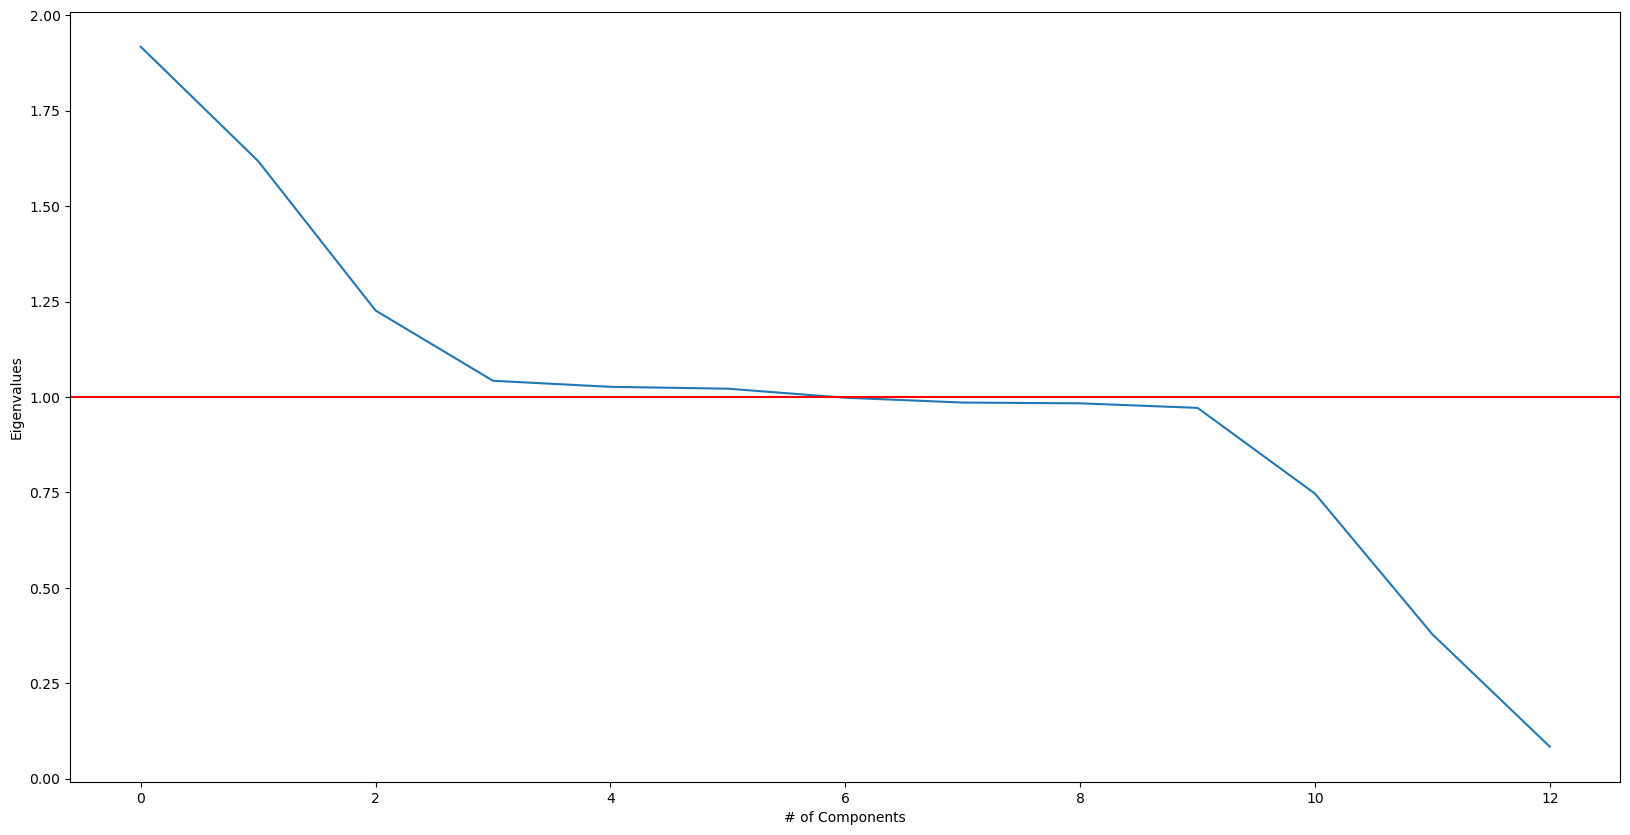

In [57]:
covariance_matrix = np.dot(df_pca_normalized.T, df_pca_normalized) / df_pca.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(covariance_matrix, eigenvector)) for eigenvector in pca.components_]

plt.figure(figsize = [20,10])
plt.plot(eigenvalues)
plt.xlabel('# of Components')
plt.ylabel('Eigenvalues')
plt.axhline(y=1, color='red')
plt.show()

In [58]:
eigenvalues

[1.917592254276536,
 1.6179634848128575,
 1.226431575679194,
 1.0423795975681247,
 1.0265086935462115,
 1.0216145270627373,
 0.9979863846315198,
 0.9852879440519579,
 0.9832547152303548,
 0.9713747665598653,
 0.7466522091308317,
 0.3781032651313506,
 0.08355058231839411]

The graph above indicates that the first six principal components have eigenvalues above 1, while components 7 through 13 have eigenvalues below 1 and are thus discarded.

<a id='PartE3'></a>
## E3: Benefits of Principal Component Analysis

Across a dataset with numerous variables, Principal Component Analysis lets us break these down into fewer dimensions, with each one representing several "like" variables (Towards Data Science, 2017). PCA does require quantitative variables, which there are relatively few of in this data, and those variables to have a relationship with each other. In this dataset, the days spent in the hospital, the total charges, and the additional charges can all be understood to have a relationship with each other, as they are all measures that can be understood to relate to the "severity of initial complaint" because a more serious problem *generally* requires a longer hospitalization and more involved (and expensive) care. Rather than testing each of these variables against readmission, PCA combines these variables (and others) into a single element, which can then be tested against readmission. Depending on the nature of the analysis performed and the variables available, this could be expanded to include several other variables. In this way, rather than testing every variable against readmission, we can test much fewer variables instead.  

<a id='PartF'></a>
## F: Panopto Recording
A Panopto recording of my code in action and my explanation of my report can be found here: https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=ffd99caf-f095-47bd-ac8d-b0d700c0f368

<a id='PartG'></a>
## G: Code References

[Pandas documentation on categorical data types](https://pandas.pydata.org/docs/user_guide/categorical.html) was used for establishing the ordered categorical datatype. 

[Pandas documentation on experimental Int64 data type](https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html) was used for casting float columns as integers while preserving null values. 

[WGU Courseware resources](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b627935e-73f8-41ad-b97b-af1e000d3015) was used to help write the code for the PCA portion (Part E) of this project. 

[Code snippit](https://www.appsloveworld.com/pandas/100/85/how-to-i-export-data-with-leading-zeros-from-pandas-to-csv-preserving-the-leading) was used preserve leading zero for the zip_code column when exporting the to a csv file

[Stackover flow post](https://stackoverflow.com/questions/52089711/why-is-astypebool-converting-all-values-to-true) was used maintain data intergity around columns that were recasted as booleans using `astype('bool')` function.


<a id='PartH'></a>
## H: Source References

[WGU Courseware resources](https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=b627935e-73f8-41ad-b97b-af1e000d3015) in addition to being used to help write the code, this lecture was useful for understanding PCA in general. 

[Matt Brems, Towards Data Science](https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c) was used to help understand the concepts of Principal Component Analysis, both why its worthwhile and how exactly it works.

[High blood pressure dangers: Hypertension's effects on your body](https://www.mayoclinic.org/diseases-conditions/high-blood-pressure/in-depth/high-blood-pressure/art-20045868) was used to understand the overall impact of High Blood Pressure.